#**Experiment Case 3: Stress-Strain curve analysis using ML**  
Original owner and performed by - Kaustubh Yewale      
  

Feel free to reach me!  
GitHub link: https://github.com/Kaustubh5352  
LinkedIn link: https://www.linkedin.com/in/kaustubh-yewale23/

###Mechanical Properties from Stress-Strain Curves

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
print("NumPy version:",np.__version__)
print("Pandas version:",pd.__version__)

NumPy version: 1.26.4
Pandas version: 2.2.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_steel=pd.read_csv('/content/drive/MyDrive/DAL Practical/Practical 3/aluminum6061 - aluminum6061.csv')
df_al=pd.read_csv('/content/drive/MyDrive/DAL Practical/Practical 3/steel1045 - steel1045.csv')

In [ ]:
df_steel.head()

,TESTNUM,POINTNUM,TIME,POSIT,FORCE,EXT,CH5,CH6,CH7,CH8
0,761,1,6.532,0.01524,201.158508,0.018893,-0.023081,NaN,NaN,NaN
1,761,2,6.702,0.01600,205.978119,0.000265,-0.013024,NaN,NaN,NaN
2,761,3,7.098,0.01720,219.295441,-0.000877,-0.024879,NaN,NaN,NaN
3,761,4,8.697,0.02350,268.505890,0.001453,-0.006798,NaN,NaN,NaN
4,761,5,10.196,0.03004,322.028168,0.001865,0.012563,NaN,NaN,NaN


In [ ]:
df_al.head()

,TESTNUM,POINTNUM,TIME,POSIT,FORCE,EXT,CH5,CH6,CH7,CH8
0,762,1,5.969,0.01284,201.030792,0.001572,-0.007133,NaN,NaN,NaN
1,762,2,6.242,0.01392,215.235886,0.000009,-0.014581,NaN,NaN,NaN
2,762,3,6.936,0.01646,246.816742,-0.000832,0.006942,NaN,NaN,NaN
3,762,4,8.632,0.02340,371.870361,0.002203,0.000776,NaN,NaN,NaN
4,762,5,10.533,0.03110,502.501862,0.001481,0.018102,NaN,NaN,NaN


In [ ]:
d = 0.506
r = d/2
A = np.pi*r**2
stress_al = (df_al[ 'FORCE']/A)*0.001
strain_al = df_al['CH5' ]*0.01
stress_steel = (df_steel [ 'FORCE']/A)*0.001
strain_steel = df_steel[ 'CH5' ]*0.01

###Plot the full stress strain curve

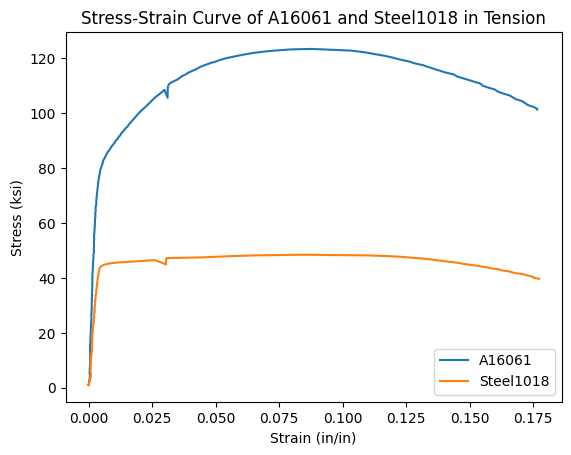

In [ ]:
fig, ax = plt.subplots()
ax.plot(strain_al, stress_al)
ax.plot(strain_steel, stress_steel)
ax.set_xlabel('Strain (in/in)')
ax.set_ylabel('Stress (ksi)')
ax.set_title('Stress-Strain Curve of A16061 and Steel1018 in Tension')
ax.legend (['A16061', 'Steel1018'])

###Calculate tensile strength

In [ ]:
# Calculate the tensile strength
ts_al = np.max(stress_al)
ts_steel = np.max(stress_steel)
print (f'The tensile strength of A16061 is: {round (ts_al,1)} ksi')
print (f'The tensile strength of Steel1018 is: {round (ts_steel,1)} ksi')

The tensile strength of A16061 is: 123.5 ksi
The tensile strength of Steel1018 is: 48.5 ksi


###Caclulate elastic modulus

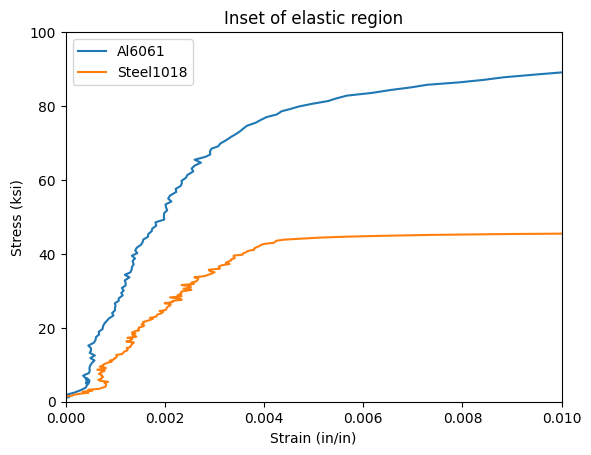

In [ ]:
fig, ax = plt.subplots()
ax.plot(strain_al, stress_al)
ax.plot(strain_steel, stress_steel)
ax.set_title('Inset of elastic region')
ax.set_xlabel('Strain (in/in)')
ax.set_ylabel('Stress (ksi)')
ax.legend (['Al6061', 'Steel1018'])
3
ax.set_xlim([0,0.01])
ax.set_ylim([0,100])
plt.show()

In [ ]:
# Find the elastic modulus of A16061
# use stress and strain values from stress-0 to stress=35 ksi
linear_stress_al_mask = stress_al < 35
linear_stress_al = stress_al[linear_stress_al_mask]
linear_strain_al = strain_al[linear_stress_al_mask]
from scipy.stats import linregress
linear_regression_output = linregress (linear_strain_al, linear_stress_al)
E_al = linear_regression_output[0]
print (f'The elastic modulus of A16061 is: {round (E_al,1)} ksi')

The elastic modulus of A16061 is: 28047.9 ksi


In [ ]:
# Find the elastic modulus of Steel1018
# use stress and strain values from stress=0 to stress=55 ksi
linear_stress_steel_mask = stress_steel < 55
linear_stress_steel = stress_steel[linear_stress_steel_mask]
linear_strain_steel = strain_steel[linear_stress_steel_mask]
linear_regression_output_steel = linregress (linear_strain_steel, linear_stress_steel)
E_steel = linear_regression_output_steel[0]
print (f'The elastic modulus of Steel1018 is: {round (E_steel,1)} ksi')

The elastic modulus of Steel1018 is: 145.5 ksi


###Calculate ductility


In [ ]:
# Find the ductility for A16061
stress_al_array = np.array(stress_al)
stress_al_last = stress_al_array[-1]
strain_al_array = np.array(strain_al)
strain_al_last = strain_al_array[-1]
EL_al = -stress_al_last/E_al + strain_al_last
print(f'The ductility of Al 6061 is {round (EL_al*100,1)}%')

The ductility of Al 6061 is 17.3%


In [ ]:
#Find the ductility for Steel1018
stress_steel_array = np.array(stress_steel)
stress_steel_last = stress_steel_array[-1]
strain_steel_array = np.array(strain_steel)
strain_steel_last = strain_steel_array[-1]
EL_steel = -stress_steel_last/E_steel + strain_steel_last
print(f'The ductility of Steel 1018 is {round (EL_steel*100,1)}%')


The ductility of Steel 1018 is -9.5%


**Conclusion:-**   
1) Aluminum 6061 exhibits higher ductility than steel 1018.   
2) Steel 1018 has a significantly higher elastic modulus than aluminum 6061. 5
